In [1]:
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import itertools
from copy import deepcopy as dcopy,copy
from scipy.ndimage import measurements
from collections import defaultdict
from fractions import Fraction
from itertools import count


In [2]:
# Another one with no fixed end point.

url='https://www.janestreet.com/puzzles/well-well-well/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
x =[text for text in soup.body.stripped_strings]

print(" ".join(x[7:10]))

A 7′-by-7′ well is dug.  It has a peculiar shape:  its depth varies from one 1′-by-1′ section to another, as shown below.  Each section is marked with its depth. (E.g., the deepest section is 49′ deep.) Water is poured into the well from a point above the section marked 1, at a rate of 1 cubic foot per minute.  Assume that water entering a region of constant depth immediately disperses to any orthogonally adjacent lower-depth regions evenly along its exposed perimeter. After how many minutes will the water level on section 43 begin to rise?


### Puzzle details
<img src="https://www.janestreet.com/puzzles/wp-content/uploads/2017/06/Jun17_puzzle.png" width="350">

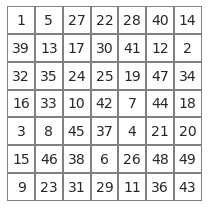

In [3]:
# Setup the constraints
fixed = np.array([[ 1, 5,27,22,28,40,14],
                  [39,13,17,30,41,12, 2],
                  [32,35,24,25,19,47,34],
                  [16,33,10,42, 7,44,18],
                  [ 3, 8,45,37, 4,21,20],
                  [15,46,38, 6,26,48,49],
                  [ 9,23,31,29,11,36,43]
                 ])

#print(fixed.shape)
fig,ax = plt.subplots(1,1,figsize=(3,3))

ax = sns.heatmap(np.zeros((7,7)),annot=fixed,cbar=False,cmap="Greys",fmt="",linewidths=1,center=4,linecolor="grey",xticklabels=[6,7,8,9,10], yticklabels=[1,2,3,4,5],
                     annot_kws={"fontsize":14})
ax.axis("off")
plt.tight_layout()

In [4]:
class Matrix():
    def __init__(self,fixed):
        self.heights = list(50-np.ravel(fixed))
        
    def neighbours(self,n):
        x = n % 7
        y = n // 7
        if x > 0:
            yield n-1
        if x <6:
            yield n+1
        if y > 0:
            yield n-7
        if y <6:
            yield n+7

    def solve(self):
        connected = {0}
        for t in count(1):
            ln = len(connected)
            unit = Fraction(1)
            while unit > 0:
                mn = min(connected, key=lambda x: self.heights[x])
                q = Fraction(1, ln)
                self.heights[mn] += q
                unit -= q
                while True:
                    for i in connected:
                        for j in self.neighbours(i):
                            if j in connected:
                                continue
                            elif self.heights[i] >= self.heights[j]:
                                connected.add(j)
                                break
                        else:
                            continue
                        break
                    else:
                        break
                    continue
            if self.heights[-1] > 7:
                break
        return(t-1)

In [9]:
start = time.perf_counter()
well = Matrix(fixed)

print("***Solved in {:.6f} seconds***\n".format(time.perf_counter() - start))   
print("Starts to fill after {} seconds".format(well.solve()))

***Solved in 0.000094 seconds***

Starts to fill after 360 seconds


In [8]:
url='https://www.janestreet.com/puzzles/solutions/june-2017-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
x =[text for text in soup.body.stripped_strings]

print(" ".join(x[7:15]))

The diagram presented here shows the depths of the 49 sections after exactly 360 minutes have elapsed. After this moment, the water level will begin to rise on the bottom-right-most section. Thus the answer to this month’s puzzle is 360 .  Congratulations to everyone who solved this month’s puzzle! Correct Submissions: Anthony Clays Garth Owen Lok Hin Wong Calum Heraty


<img src="https://www.janestreet.com/puzzles/wp-content/uploads/2017/07/Jun17_solution.png" width="350">